AI ASSISTNT USAGE CLASSIFICATION

---


SECTION 1: BASIC EDA

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [2]:
# Loading the data
data = pd.read_csv(r"C:\Users\Makena\Desktop\Lux\Python-Assignments\Classification-Project\ai_assistant_usage_student_life.csv")
df = pd.DataFrame(data)

# Displaying the first five rows
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
# Checking the data set rows and column numbers
df.shape

(10000, 11)

In [4]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
# Checking for missing values
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SessionLengthMin,10000.0,19.846467,13.897302,0.03,9.63,16.65,26.67,110.81
TotalPrompts,10000.0,5.607500,4.648764,1.00,2.00,4.00,8.00,39.00
AI_AssistanceLevel,10000.0,3.479500,0.991805,1.00,3.00,4.00,4.00,5.00
SatisfactionRating,10000.0,3.417780,1.143331,1.00,2.60,3.50,4.40,5.00


In [7]:
# Unique values in StudentLevel, Discipline, and TaskType.
columns = ['StudentLevel','Discipline','TaskType']
for col in columns:
    print(col, df[col].nunique())

StudentLevel 3
Discipline 7
TaskType 6


In [8]:
# The most common TaskType
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [9]:
# Average SessionLengthMin for each StudentLevel.
average_sessionlength = df.groupby('StudentLevel')['SessionLengthMin'].agg("mean")
print(f"The average SessionLengthMin for each StudentLevel:\n{average_sessionlength}\n")

The average SessionLengthMin for each StudentLevel:
StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64



SECTION 2: VISUALIZATION

Text(0.5, 0, 'SessionLengthMin')

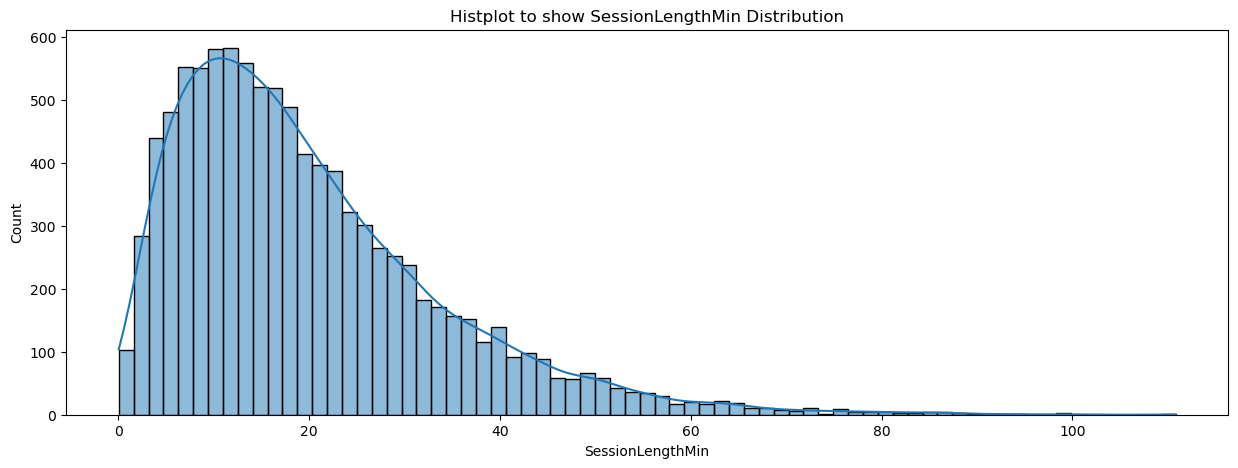

In [10]:
# Histogram for SessionLengthMin
plt.figure(figsize=(15,5))
sns.histplot(df, x=df['SessionLengthMin'], kde= True)
plt.title("Histplot to show SessionLengthMin Distribution")
plt.xlabel("SessionLengthMin")
#plt.show()

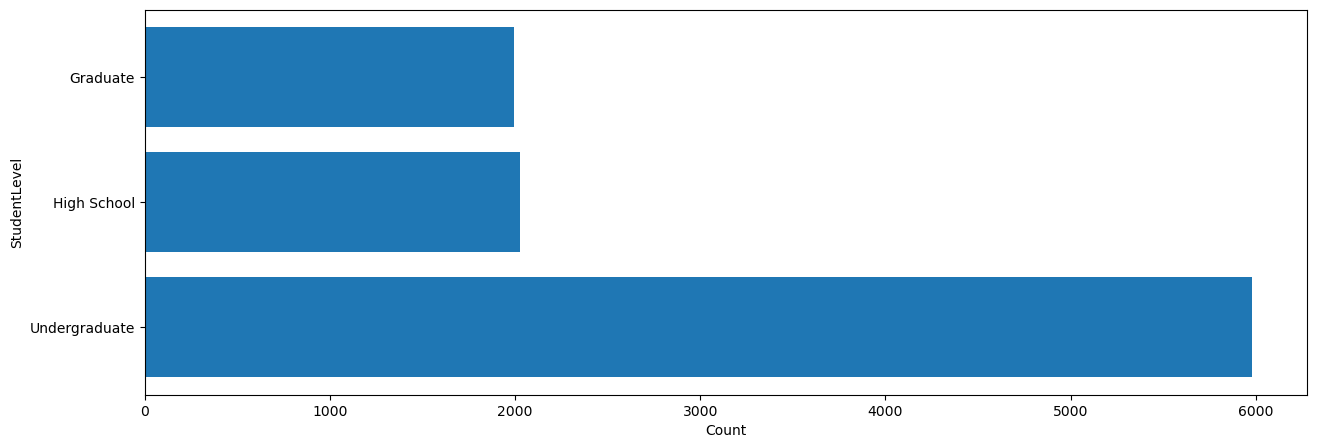

In [11]:
# Bar chart of session counts by StudentLevel
student_level = df['StudentLevel'].value_counts()

plt.figure(figsize=(15,5))
plt.barh(student_level.index, student_level.values)
plt.xlabel("Count")
plt.ylabel("StudentLevel")
plt.show()

<Axes: xlabel='TaskType', ylabel='count'>

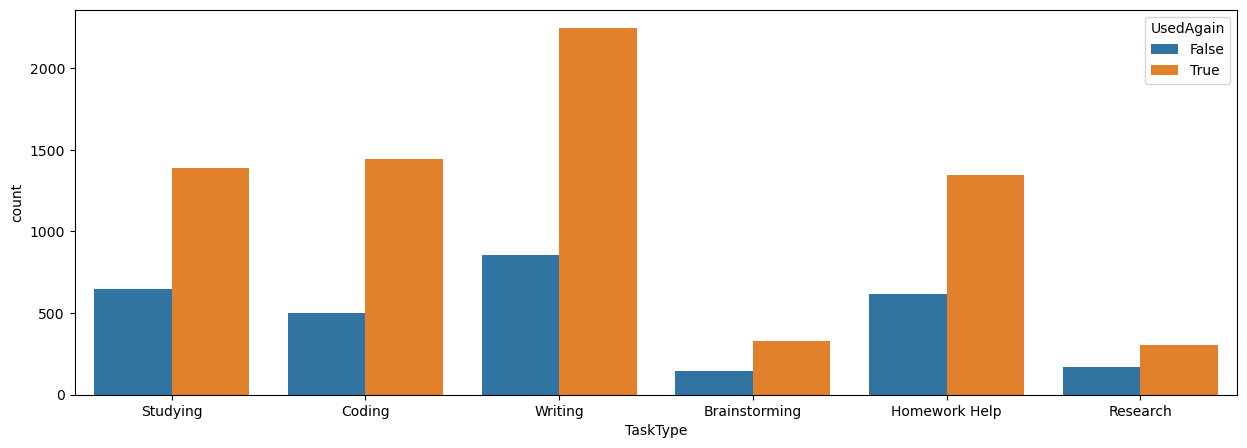

In [12]:
# Countplot of TaskType
plt.figure(figsize=(15,5))
sns.countplot(df,x='TaskType', hue='UsedAgain')

<Axes: xlabel='StudentLevel', ylabel='SessionLengthMin'>

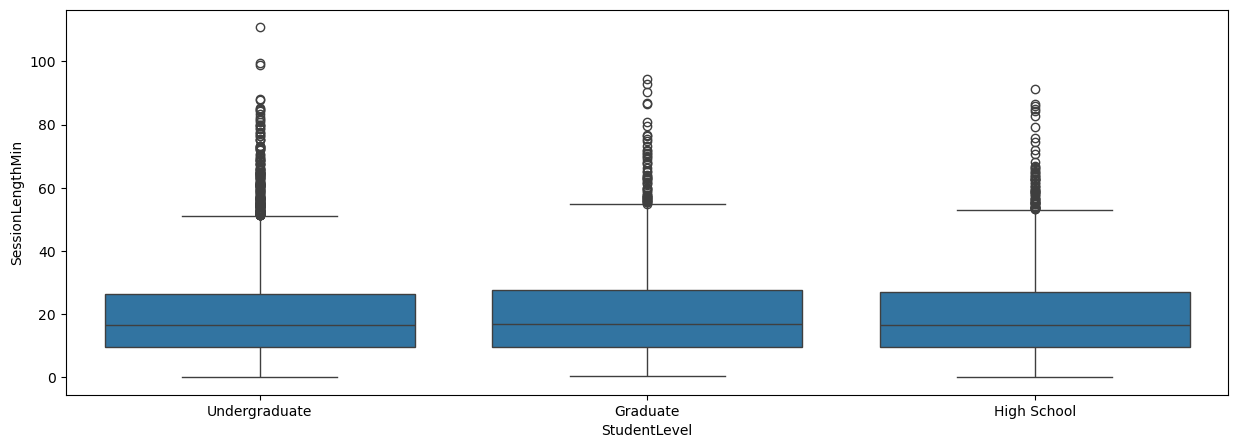

In [13]:
# Boxplot of SessionLengthMin grouped by StudentLevel
plt.figure(figsize=(15,5))
sns.boxplot(df,x=('StudentLevel'), y=('SessionLengthMin'))

([<matplotlib.patches.Wedge at 0x240f25a5550>,
 [Text(0.08010249850604247, 1.097079573109029, 'Assignment Completed'),
  Text(-0.8013922468763425, -0.753505452300438, 'Idea Drafted'),
  Text(0.6128501248629529, -0.9134630394577896, 'Confused'),
  Text(1.069364406086425, -0.25779791891213594, 'Gave Up')])

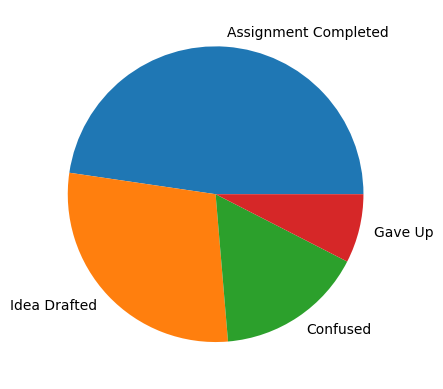

In [14]:
# Piechart for FinalOutcomes
final_outcomes = df['FinalOutcome'].value_counts()
plt.pie(final_outcomes.values, labels=final_outcomes.index)

Text(0.5, 1.0, 'Scatter plot: SessionLengthMin vs TotalPrompts')

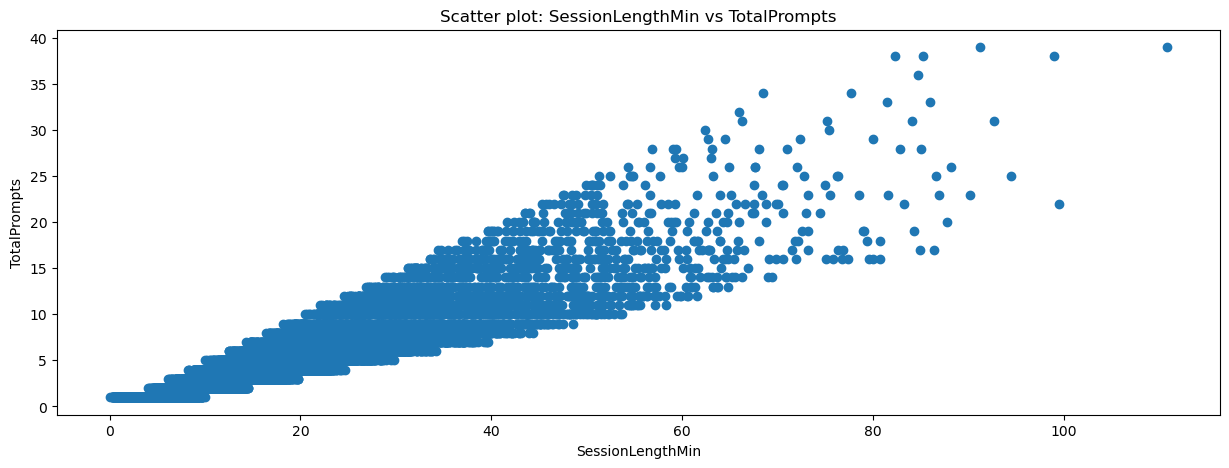

In [15]:
# Scatterplot of SessionLengthMin vs. TotalPrompts.
plt.figure(figsize=(15,5))
plt.scatter(df['SessionLengthMin'], df['TotalPrompts'])
plt.xlabel("SessionLengthMin")
plt.ylabel("TotalPrompts")
plt.title("Scatter plot: SessionLengthMin vs TotalPrompts")

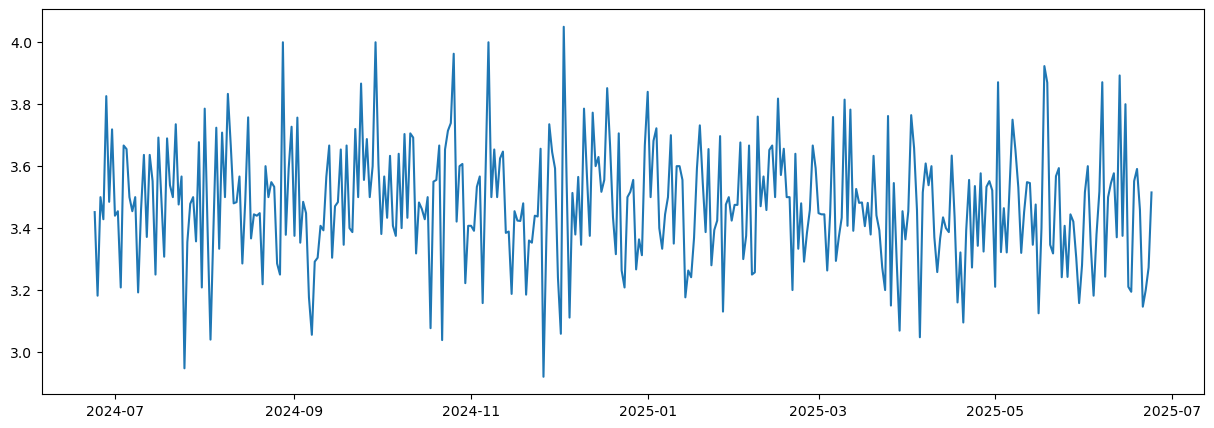

In [16]:
# Average AI_AssistanceLevel over time (SessionDate).
df["SessionDate"] = pd.to_datetime(df["SessionDate"])

assistance_level_mean = df.groupby('SessionDate')['AI_AssistanceLevel'].agg('mean')

plt.figure(figsize=(15,5))
plt.plot(assistance_level_mean)

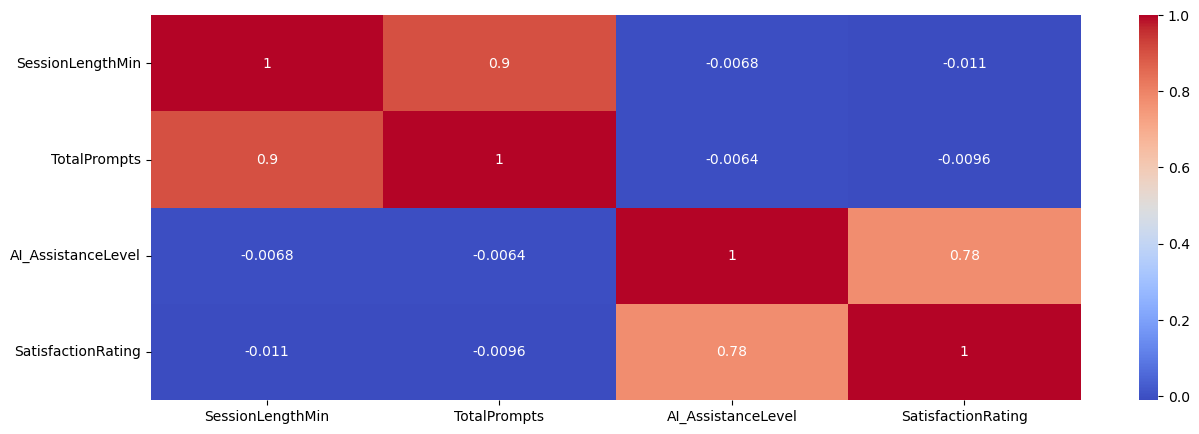

In [17]:
# Correlation heatmap
numeric_dt = df.select_dtypes(include=['number'])

#Correlation Matrix
corr_matrix = numeric_dt.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

SECTION 3: GROUP BY & AGGREGATION

In [18]:
# Average SessionLengthMin for each TaskType.
session_length_task_type = df.groupby('TaskType')['SessionLengthMin'].agg('mean')
print(f"Average SessionLengthMin for each TaskType:\n{session_length_task_type}\n")

Average SessionLengthMin for each TaskType:
TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64



In [19]:
#  Discipline with Most Sessions
sessions_per_discipline = df.groupby('Discipline')['SessionID'].count()
print(f"Sessions per Discipline:\n{sessions_per_discipline}\n")

Sessions per Discipline:
Discipline
Biology             1458
Business            1410
Computer Science    1445
Engineering         1430
History             1417
Math                1422
Psychology          1418
Name: SessionID, dtype: int64



In [20]:
# Average AI_AssistanceLevel across StudentLevel.
assistance_studentlevel = df.groupby('StudentLevel')['AI_AssistanceLevel'].agg("mean")
print(f"Average AI_AssistanceLevel across StudentLevel:\n{assistance_studentlevel}\n")

Average AI_AssistanceLevel across StudentLevel:
StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64



In [21]:
# Graduate Students Most Common Outcome
graduates = df[df['StudentLevel']== 'Graduate']
graduate_outcomes = graduates.groupby('FinalOutcome')['StudentLevel'].count()
graduate_outcomes

FinalOutcome
Assignment Completed    936
Confused                331
Gave Up                 161
Idea Drafted            567
Name: StudentLevel, dtype: int64

In [22]:
# Median SessionLengthMin for each FinalOutcome..
median_session_length = df.groupby('FinalOutcome')['SessionLengthMin'].median()
print(f"Median SessionLengthMin for each FinalOutcome:\n{median_session_length}\n")

Median SessionLengthMin for each FinalOutcome:
FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64



SECTION 4: FEATURE ENGINEERING AND ENCODING

In [23]:
# SessionDate into Year, Month, and Day column
df["Day"] = df["SessionDate"].dt.day
df["Month"] = df["SessionDate"].dt.month
df["Year"] = df["SessionDate"].dt.year

df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Day,Month,Year
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,3,11,2024
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,25,8,2024
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,12,1,2025
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,6,5,2025
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,18,3,2025


In [24]:
# Label Encoding StudentLevel
student_level_order = {"High School":0, "Undergraduate":1, "Graduate":2}

# Initialize the model
df['StudentLevelEncoded'] = df['StudentLevel'].map(student_level_order)

#df.head()

In [25]:
# OneHot encoding to task type and other columns
categorical_columns=['TaskType','Discipline',"UsedAgain"]
encoder = OneHotEncoder(sparse_output=False, drop="first")

one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


# concat to combine the two dfs
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [26]:
# PromptsPerMinute = TotalPrompts / SessionLengthMin.
df_encoded["PromptsPerMinute"]=df_encoded["TotalPrompts"]/df_encoded["SessionLengthMin"]

In [27]:
# SessionLengthMin categories
df_encoded["SessionLengthCategories"]=pd.cut(df['SessionLengthMin'], bins =[0.0,20.0,40.0,120], labels=["Short","Medium","Long"])
df_encoded.head()

,SessionID,StudentLevel,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,SatisfactionRating,Day,Month,...,TaskType_Writing,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,UsedAgain_True,PromptsPerMinute,SessionLengthCategories
0,SESSION00001,Undergraduate,2024-11-03,31.20,11,2,Assignment Completed,1.0,3,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.352564,Medium
1,SESSION00002,Undergraduate,2024-08-25,13.09,6,3,Assignment Completed,2.0,25,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.458365,Short
2,SESSION00003,Undergraduate,2025-01-12,19.22,5,3,Assignment Completed,3.3,12,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.260146,Short
3,SESSION00004,Undergraduate,2025-05-06,3.70,1,3,Assignment Completed,3.5,6,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.270270,Short
4,SESSION00005,Undergraduate,2025-03-18,28.12,9,3,Assignment Completed,2.9,18,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.320057,Medium


In [28]:
df_encoded.head()

,SessionID,StudentLevel,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,SatisfactionRating,Day,Month,...,TaskType_Writing,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,UsedAgain_True,PromptsPerMinute,SessionLengthCategories
0,SESSION00001,Undergraduate,2024-11-03,31.20,11,2,Assignment Completed,1.0,3,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.352564,Medium
1,SESSION00002,Undergraduate,2024-08-25,13.09,6,3,Assignment Completed,2.0,25,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.458365,Short
2,SESSION00003,Undergraduate,2025-01-12,19.22,5,3,Assignment Completed,3.3,12,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.260146,Short
3,SESSION00004,Undergraduate,2025-05-06,3.70,1,3,Assignment Completed,3.5,6,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.270270,Short
4,SESSION00005,Undergraduate,2025-03-18,28.12,9,3,Assignment Completed,2.9,18,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.320057,Medium


['SessionID','SessionDate','Day','Month','Year', 'StudentLevel']
Encoding; FinalOutcome, Used Again
session lenghth categories 

#### SECTION 5: MACHINE LEARNING

In [29]:
# LabelEncoding Final outcome
le = LabelEncoder()
df_encoded['FinalOutcome_encoded'] = le.fit_transform(df['FinalOutcome'])
df_encoded['FinalOutcome_encoded'].astype(int)

# Drop unnecessary columns
df_encoded=df_encoded.drop(['SessionID','SessionDate','Day','Month','Year', 'StudentLevel','FinalOutcome','SessionLengthCategories','SessionLengthMin'],axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalPrompts                 10000 non-null  int64  
 1   AI_AssistanceLevel           10000 non-null  int64  
 2   SatisfactionRating           10000 non-null  float64
 3   StudentLevelEncoded          10000 non-null  int64  
 4   TaskType_Coding              10000 non-null  float64
 5   TaskType_Homework Help       10000 non-null  float64
 6   TaskType_Research            10000 non-null  float64
 7   TaskType_Studying            10000 non-null  float64
 8   TaskType_Writing             10000 non-null  float64
 9   Discipline_Business          10000 non-null  float64
 10  Discipline_Computer Science  10000 non-null  float64
 11  Discipline_Engineering       10000 non-null  float64
 12  Discipline_History           10000 non-null  float64
 13  Discipline_Math  

In [30]:
# Classification models for FinalOutcome
# decision tree, random forest, naivebeyes
if 'FinalOutcome_encoded' in df_encoded:
    print("present")

X=df_encoded.drop(['FinalOutcome_encoded'], axis = 1)
y=df_encoded['FinalOutcome_encoded']

# Splitting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# models 
dt=DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
rf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=None, class_weight="balanced")
naive=GaussianNB()

models = [dt,rf,naive]

present


In [31]:
#Initialize model
for model in models:
  print(f"Training Model: {model}")
  mol = model.fit(X_train, y_train)
  print(f"Predicting on model: {model}")
  pred = mol.predict(X_test)
  print("."*50)
  print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
  print(f"Classification report for model: {model}")
  print(classification_report(y_test, pred, zero_division=0))
  print("-"*70)


Training Model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
Predicting on model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
..................................................
Confusion Matrix:
 [[677 195 149 387]
 [125 166 125  79]
 [ 77  62  59  38]
 [331 135  87 308]]
Classification report for model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1408
           1       0.30      0.34      0.32       495
           2       0.14      0.25      0.18       236
           3       0.38      0.36      0.37       861

    accuracy                           0.40      3000
   macro avg       0.34      0.36      0.35      3000
weighted avg       0.43      0.40      0.41      3000

----------------------------------------------------------------------
Training Model: RandomForestClassifier(c

In [39]:
# UsedAgain using LogisticRegression, KNN, GradientBoostClassifier
X=df_encoded.drop(['UsedAgain_True'], axis=1)
y=df_encoded['UsedAgain_True']

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# Initialize the model
lr=LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
knn = KNeighborsClassifier(n_neighbors=5)
gboost = GradientBoostingClassifier(n_estimators=100)


# Scale the data 
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# models
models = [lr,gboost,knn]


In [40]:
# Prediction and evaluation
#Initialize model
for model in models:
  print(f"Training Model: {model}")
  mol = model.fit(X_train, y_train)
  print(f"Predicting on model: {model}")
  pred = mol.predict(X_test)
  print("."*50)
  print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
  print(f"Classification report for model: {model}")
  print(classification_report(y_test, pred, zero_division=0))
  print("-"*70)

Training Model: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
Predicting on model: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
..................................................
Confusion Matrix:
 [[315 300]
 [642 743]]
Classification report for model: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
              precision    recall  f1-score   support

         0.0       0.33      0.51      0.40       615
         1.0       0.71      0.54      0.61      1385

    accuracy                           0.53      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.59      0.53      0.55      2000

----------------------------------------------------------------------
Training Model: GradientBoostingClassifier()
Predicting on model: GradientBoostingClassifier()
..................................................
Confusion Matrix:
 [[ 301  314]
 [ 201 1184]]
Classification repo

 SECTION 6: HYPERPATAMETER TUNING

In [34]:
# Cross-Validation for logistic regression
folds = 5
kf = KFold(n_splits=folds)
cv_results = cross_val_score(lr, X, y, cv=kf, scoring="accuracy")
print(cv_results.mean())

0.5317999999999999


In [35]:
# Gridsearch to tune the decision tree classifier
X=df_encoded.drop("FinalOutcome_encoded", axis =1)
y=df_encoded["FinalOutcome_encoded"]


# define grid
grid = {
    "max_depth":[5,10,15,20, None],
    "class_weight":['balanced', None],
    }

mod=DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(mod, grid, cv=3, scoring='f1_weighted')
grid_search.fit(X,y)


print("Best DecisionTree params:", grid_search.best_params_)
print("Best DecisionTree score:", grid_search.best_score_)



Best DecisionTree params: {'class_weight': None, 'max_depth': 5}
Best DecisionTree score: 0.43953344696379343


In [36]:
# Tuning RadndomForestClassifier 
X=df_encoded.drop("UsedAgain_True", axis=1)
y=df_encoded["UsedAgain_True"]

raf=RandomForestClassifier(random_state=42)

raf_grid={
    "max_depth":[5,10,None],
    "class_weight":["balanced", None],
    "n_estimators":[100,200]
}

raf_grid_search = GridSearchCV(raf, raf_grid,cv=3, scoring='f1_weighted')
raf_grid_search.fit(X,y)

print("Best RandomForest params:", raf_grid_search.best_params_)
print("Best RandomForest score:", raf_grid_search.best_score_)


Best RandomForest params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}
Best RandomForest score: 0.7391023686784483


In [37]:
# Other models to predict UsedAgain
# UsedAgain using LogisticRegression, KNN, GradientBoostClassifier
X=df_encoded.drop(['UsedAgain_True'], axis=1)
y=df_encoded['UsedAgain_True']

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# Initialize the model
dt=DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
rf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=None, class_weight="balanced")
naive=GaussianNB()

# models
models = [dt,rf,naive]


In [38]:
# Prediction and evaluation
#Initialize model
for model in models:
  print(f"Training Model: {model}")
  mol = model.fit(X_train, y_train)
  print(f"Predicting on model: {model}")
  pred = mol.predict(X_test)
  print("."*50)
  print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
  print(f"Classification report for model: {model}")
  print(classification_report(y_test, pred, zero_division=0))
  print("-"*70)

Training Model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
Predicting on model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
..................................................
Confusion Matrix:
 [[ 322  293]
 [ 316 1069]]
Classification report for model: DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       615
         1.0       0.78      0.77      0.78      1385

    accuracy                           0.70      2000
   macro avg       0.64      0.65      0.65      2000
weighted avg       0.70      0.70      0.70      2000

----------------------------------------------------------------------
Training Model: RandomForestClassifier(class_weight='balanced', random_state=42)
Predicting on model: RandomForestClassifier(class_weight='balanced', random_state=42)
...............................